Processing google_nsl_page_01.html
Processing google_nsl_page_02.html
2023-05-26 00:00:00 546712
Processing google_nsl_page_03.html
Processing google_nsl_page_04.html
Processing google_nsl_page_05.html
Processing google_nsl_page_06.html
Processing google_nsl_page_07.html
Processing google_nsl_page_08.html
Processing google_nsl_page_09.html
Processing google_nsl_page_10.html
Processing google_nsl_page_11.html
Processing google_nsl_page_12.html
Processing google_nsl_page_13.html
Processing google_nsl_page_14.html
Got 271 NSLs from Google
Got 61 NSLs from nslarchive.org
Processing NSL requests from FISA
Processing Issued NSL
Processing ROIs
Use degree 1 polyfit
Use degree 1 polyfit
Use degree 1 polyfit


/tmp/ipykernel_13884/659411679.py:334: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


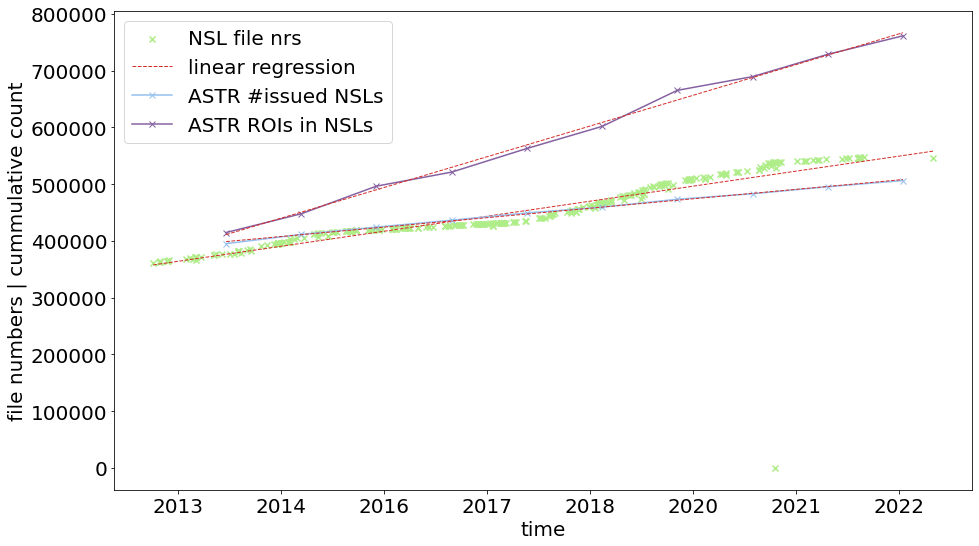

In [13]:
##### !!! TODO@Miro Explain 377908 !!! #####
#!/usr/bin/python3
# This file plots the file number of issued NSLs
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import os
from bs4 import BeautifulSoup
from datetime import datetime

# Optionally, truncate older (and very sparse) data
MIN_YEAR = None

# Structured NSL Data
class NSL:
    def __init__(self, issue_date, nsl_file_number_only, year = None, release_date = None, link_to_nsl_file = None, link_to_release_letter = None):
        self.issue_date = issue_date
        self.nsl_file_number_only = nsl_file_number_only

        # The following are only available from NSLs released by Google
        self.year = year  
        self.release_date = release_date # Only available from NSLs released by Google
        self.link_to_nsl_file = None # Only available from NSLs released by Google
        self.link_to_release_letter = None # Only available from NSLs released by Google
        if year and year > 2022:
            print(issue_date, nsl_file_number_only)

    def __repr__(self):
        return self.__str__()

    def __str__(self):
        return f"NSL({self.nsl_file_number_only}, {self.issue_date.strftime('%Y-%m-%d')})"



# Directory where we store all html pages that contain links to nsl
# here, data from March 1, 2024
DATA_DIR = "../../data/raw/google_nsl_pages/2024_03_01"

# Get all raw html pages
files = sorted(os.listdir(DATA_DIR))
files = [f for f in files if '.html' in f]

nsls = []
# Process NSL Letters
for f in files:
    print('Processing ' + f)
    # read the raw html
    with open("{}/{}".format(DATA_DIR, f)) as fin:
        html = fin.read()
    # parse html
    soup = BeautifulSoup(html)
    
    # find the table that list nsl letters
    table = soup.find_all('table', class_='google-visualization-table-table')[-1]
    
    # record data for each nsl letter
    nsl_file_number = None
    nsl_file_url = None
    nsl_issue_date = None
    nsl_release_date = None
    nsl_release_url = None

    idx = 0
    for td in table.find_all('td'):
        if idx % 3 == 0:
            nsl_file_number = td.text
            nsl_file_url = td.find('a', href=True)['href']
        if idx % 3 == 1:
            nsl_issue_date = td.text
            # Convert to obj
            nsl_issue_date = datetime.strptime(nsl_issue_date, '%b %d, %Y')

        if idx % 3 == 2:
            nsl_release_date = td.text
            nsl_release_url = td.find('a', href=True)['href']
            # Structure this data as object.
            nsl_file_number_only = nsl_file_number.split('-')[-1]
            nsls.append(NSL(nsl_issue_date, nsl_file_number_only, year = nsl_issue_date.year, release_date = nsl_release_date, link_to_nsl_file = nsl_file_url,link_to_release_letter = nsl_release_url))
        idx += 1


print("Got", len(nsls), "NSLs from Google")

def poly_regression(xs, ys, deg=1):
    """
    Compute regression on xs, ys with polynomial of degree `deg`
    (for deg=1, this computes the linear regression)
    """                                                                                                                                                                                                        
    print(f"Use degree {deg} polyfit")
    x_vals = np.array(xs)
    coeffs = np.polyfit(xs, np.array(ys), deg=deg)
    new_xs = np.linspace(xs[0], xs[-1], len(x_vals))
    new_ys = []
    for x in new_xs:
        y = 0
        for i, coeff in enumerate(coeffs):
            y += x**(deg-i) * coeff
        new_ys.append(y)

    return new_xs, new_ys

def plot_regression(ax, xs, ys, deg=1, label=None):
    """
    Add a line with the polynomial regression of degree `deg` to axis `ax`
    """
    regression_xs, regression_ys = poly_regression(xs, ys)                                                                                                                                                               
    ax1.plot(regression_xs, regression_ys, linestyle="--", color="#d52d2a", label=label, linewidth=1)

# nsl data from nslarchive
# date, number
nslarchive_nsls = [
    ["2005-05-19", "43906"],
    ["2013-03-29", "365658"],
    ["2013-08-01", "371110"],
    ["2015-05-29", "415070"],
    ["2013-03-19", "364689"],
    ["2013-03-19", "364689"],
    ["2010-03-01", "272979"],
    ["2013-10-31", "375880"],
    ["2014-09-02", "394627"],
    ["2014-09-11", "395838"],
    ["2014-09-11", "396103"],
    ["2014-09-23", "396300"],
    ["2015-08-07", "417535"],
    ["2015-09-21", "418313"],
    ["2009-12-29", "264375"],
    ["2015-08-26", "417720"],
    ["2016-04-06", "421818"],
    ["2015-04-08", "413741"],
    ["2012-12-17", "358696"],
    ["2015-09-21", "418313"],
    ["2016-06-10", "422732"],
    ["2014-01-21", "377687"],
    ["2010-06-09", "287729"],
    ["2010-06-09", "288826"],
    ["2012-09-04", "355105"],
    ["2012-09-07", "355263"],
    ["2013-03-22", "365428"],
    ["2014-03-11", "379426"],
    ["2014-11-05", "398374"],
    ["2012-05-01", "349490"],
    ["2015-08-10", "417609"],
    ["2014-06-20", "390649"],
    ["2017-05-19", "430020"],
    ["2017-05-24", "429936"],
    ["2010-02-12", "271500"],
    ["2010-03-19", "276879"],
    ["2010-05-11", "287342"],
    ["2010-06-01", "291339"],
    ["2010-06-28", "293548"],
    ["2010-08-19", "302279"],
    ["2010-10-15", "315095"],
    ["2010-11-15", "320727"],
    ["2015-11-27", "419074"],
    ["2017-09-05", "431971"],
    ["2017-09-05", "431971"],
    ["2017-09-05", "431971"],
    ["2017-09-05", "431971"],
    ["2017-09-05", "431971"],
    ["2015-03-24", "407597"],
    ["2014-11-05", "397935"],
    ["2014-02-25", "380840"],
    ["2014-02-27", "381391"],
    ["2014-02-28", "381751"],
    ["2018-03-15", "440748"],
    ["2018-08-28", "450995"],
    ["2018-12-06", "463687"],
    ["2018-12-27", "466228"],
    ["2019-07-23", "483160"],
    ["2019-10-17", "499673"],
    ["2020-05-14", "508552"],
    ["2021-03-31", "531193"],
]

print("Got", len(nslarchive_nsls), "NSLs from nslarchive.org")

for nsl_issue_date, nsl_file_number_only in nslarchive_nsls:
    # convert to datetime obj
    nsl_issue_date = datetime.strptime(nsl_issue_date, '%Y-%m-%d')
    nsls.append(NSL(nsl_issue_date,nsl_file_number_only))

public_available_nsls_x_axis_issue_date = []
public_available_nsls_y_axis_nsl_number = []
for nsl in nsls:
    if MIN_YEAR and nsl.issue_date.year < MIN_YEAR:
        continue

    public_available_nsls_x_axis_issue_date.append(nsl.issue_date)
    # some nsl_file_number_only has (a) / (b). handle this situation
    vals = nsl.nsl_file_number_only.split("(")
    nsl_file_number_int = int(vals[0])
    
    # handle (a)/(b) in file name
    if len(vals) > 1:
        letter_nr = (ord(vals[1][:-1]) - ord("a"))/26
        nsl_file_number_int += letter_nr
    public_available_nsls_y_axis_nsl_number.append(nsl_file_number_int)

fisa_nsls_us = {
    2005: 9254,
    2006: 12583,
    2007: 16804,
    2008: 24744,
    2009: 14788,
    2010: 24287,
    2011: 16511,
    2012: 15229,
    2013: 14219,
    2014: 12453,
    2015: 9418,
    2016: 8727,
    2017: 9006,
    2018: 11454,
    2019: 8557,
    2020: 6670,
    2021: 7607,
    2022: 8587
}

fisa_nsls_req_non_us = {
    2015: 31863,
    2016: 6651,
    2017: 14861,
    2018: 14481,
    2019: 35848,
    2020: 6187,
    2021: 9486,
    2022: 9103
}

fisa_nsls_req_sub = {
    2015: 7361,
    2016: 9432,
    2017: 17712,
    2018: 12937,
    2019: 19601,
    2020: 11368,
    2021: 14732,
    2022: 14927
}

nsls_issued = {
    2013: 19212,
    2014: 16348,
    2015: 12870,
    2016: 12150,
    2017: 12762,
    2018: 10235,
    2019: 13850,
    2020: 9682,
    2021: 12362,
    2022: 10941
}

rois = {
    2013: 38832,
    2014: 33024,
    2015: 48642,
    2016: 24801,
    2017: 41579,
    2018: 38872,
    2019: 63466,
    2020: 24225,
    2021: 39214,
    2022: 32617
}

def get_cumulative_nsls_over_years(data, base_number_of_nsls=0):
    # start with base_number_of_nsls if not 0
    x_axis_time = []
    y_axis_total_nsls = []
    total_number_of_nsls = base_number_of_nsls
    for year, number in data.items():
        total_number_of_nsls += number
        x_axis_time.append(datetime(year=year, month=12, day=31))
        y_axis_total_nsls.append(total_number_of_nsls)
    return x_axis_time, y_axis_total_nsls

print("Processing NSL requests from FISA")
fisa_nsls_req = {}
for year, number_of_nsls_that_year in fisa_nsls_us.items():
    if MIN_YEAR and year >= MIN_YEAR:
        fisa_nsls_req[year] = number_of_nsls_that_year + fisa_nsls_req_non_us.get(year, 0) + fisa_nsls_req_sub.get(year, 0)

print("Processing Issued NSL")
astr_nsls_issued_x_axis_time, astr_nsls_issued_y_axis_cumulative_number = get_cumulative_nsls_over_years(nsls_issued, 377908-next(iter(nsls_issued)))

print("Processing ROIs")
astr_rois_in_nsls_x_axis_time, astr_rois_in_nsls_y_axis_cumulative_number = get_cumulative_nsls_over_years(rois, 377908-next(iter(rois)))


#
# Plotting (following guidelines of MP)
#
plt.rc("axes", axisbelow=True)

plt.rcParams["font.size"] = 20
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["figure.figsize"] = (14,8)

colors = ["#afed89", "#ffc1cc", "#ebc197", "#95c0ef", "#8561a1", 
            "#edc895", "#2c7707", "#9c9ed1", "#ccab0a"]

def to_ordinal(xs):
    return list(map(lambda x: x.toordinal(), xs))

# sort file numbers
public_available_nsls_x_axis_issue_date_ordinal = to_ordinal(public_available_nsls_x_axis_issue_date)
sorted_public_available_nsls_plotting_data = sorted(zip(public_available_nsls_x_axis_issue_date_ordinal, public_available_nsls_y_axis_nsl_number), key=lambda x: x[0])
public_available_nsls_x_axis_issue_date_sorted, public_available_nsls_y_axis_nsl_number_sorted = map(list, list(zip(*sorted_public_available_nsls_plotting_data)))

# Plotting the numbers acquired from different sources
fig, ax1 = plt.subplots()

# nsl numbers from publicly available nsl files
plt.scatter(public_available_nsls_x_axis_issue_date_sorted, public_available_nsls_y_axis_nsl_number_sorted, color=colors[0], marker="x", label="NSL file nrs")
plot_regression(ax1, public_available_nsls_x_axis_issue_date_sorted, public_available_nsls_y_axis_nsl_number_sorted, label="linear regression")

# number reported in astar
plt.plot(to_ordinal(astr_nsls_issued_x_axis_time), astr_nsls_issued_y_axis_cumulative_number, colors[3], marker="x", label="ASTR #issued NSLs")
plot_regression(ax1, to_ordinal(astr_nsls_issued_x_axis_time), astr_nsls_issued_y_axis_cumulative_number)

# rois reported in astar
plt.plot(to_ordinal(astr_rois_in_nsls_x_axis_time), astr_rois_in_nsls_y_axis_cumulative_number, colors[4], marker="x", label="ASTR ROIs in NSLs")
plot_regression(ax1, to_ordinal(astr_rois_in_nsls_x_axis_time), astr_rois_in_nsls_y_axis_cumulative_number)


ax = plt.gca()
x_ticks = ax.get_xticks()

# set plot xticklabels
new_labels = [datetime.fromordinal(int(item)).year for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

# Save
plt.xlabel("time")
plt.ylabel("file numbers | cummulative count")
plt.legend(loc="upper left")
plt.tight_layout()

OUTPUT_DATA_DIR = "../../data/processed/"
plt.savefig("{}/file_numbers.pdf".format(OUTPUT_DATA_DIR))
plt.savefig("{}/file_numbers.png".format(OUTPUT_DATA_DIR))